<a href="https://colab.research.google.com/github/Paulo-fernds/Projeto-detec-o-facial/blob/main/Faces_com_CV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Detecção de faces

In [21]:
import cv2 # OpenCV

In [22]:
imagem = cv2.imread('/content/pessoas.jpg')

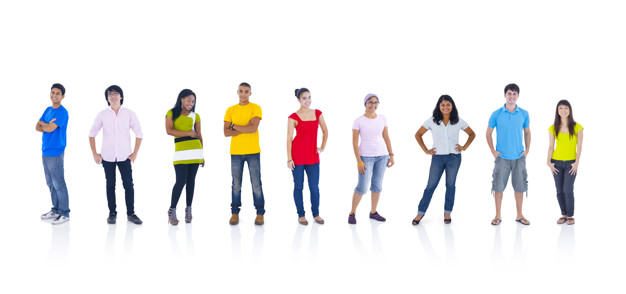

In [23]:
#cv2.imshow(imagem)
from google.colab.patches import cv2_imshow
cv2_imshow(imagem)

In [24]:
detector_face = cv2.CascadeClassifier('/content/fullbody.xml')

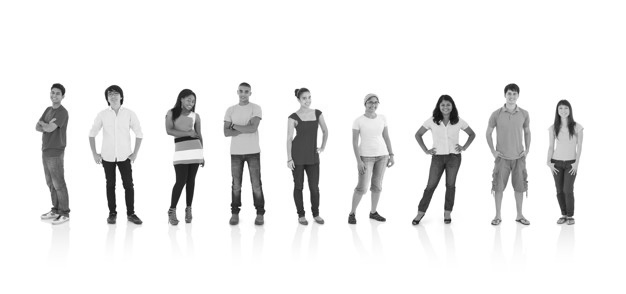

In [25]:
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
cv2_imshow(imagem_cinza)

In [26]:
deteccoes = detector_face.detectMultiScale(imagem_cinza, scaleFactor=1.2, minSize=(10,10))

In [27]:
deteccoes

array([[462,  61,  86, 172],
       [194,  53,  95, 189],
       [270,  94,  67, 133],
       [ 69,  56,  98, 195],
       [134,  55,  90, 180],
       [325,  68,  87, 173],
       [431, 167,  34,  68]], dtype=int32)

In [28]:
len(deteccoes)

7

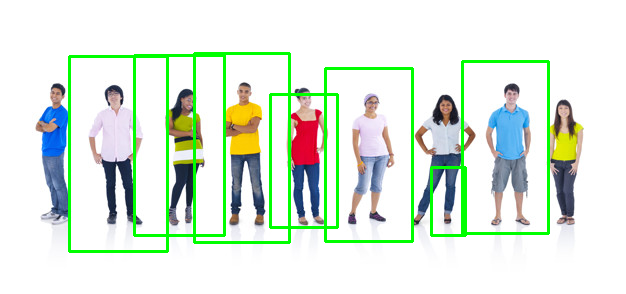

In [29]:
for (x, y, l, a) in deteccoes:
  #print(x, y, l, a)
  cv2.rectangle(imagem, (x, y), (x + l, y + a), (0,255,0), 2)
cv2_imshow(imagem)

## Detecção do corpo

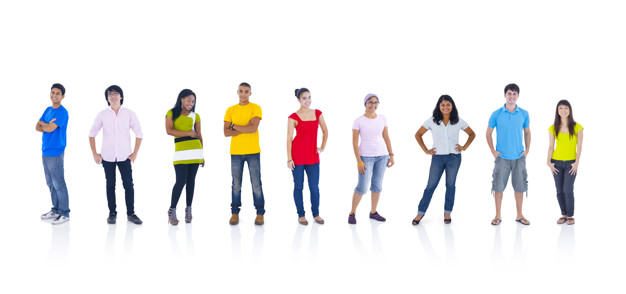

In [30]:
image = cv2.imread('/content/pessoas.jpg')
cv2_imshow(image)

8
[[461  60  92 184]
 [195  47  96 192]
 [266  80  75 151]
 [532 103  66 133]
 [327  69  84 169]
 [144 100  71 142]
 [ 70  57  95 189]
 [ 12  66  90 180]]


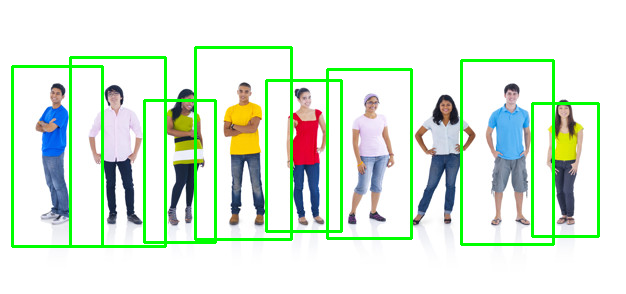

In [31]:
detector_corpo = cv2.CascadeClassifier('/content/fullbody.xml')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = detector_corpo.detectMultiScale(image_gray, scaleFactor=1.1, minSize=(50,50))
print(len(detections))
print(detections)
for (x, y, l, a) in detections:
  cv2.rectangle(image, (x, y), (x + l, y + a), (0,255,0), 2)
cv2_imshow(image)

## Reconhecimento facial

### Treinamento

In [32]:
from PIL import Image
import numpy as np

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
import zipfile
path = '/content/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [37]:
import os
os.listdir('/content/yalefaces/train')

['subject08.surprised.gif',
 'subject10.normal.gif',
 'subject09.glasses.gif',
 'subject06.wink.gif',
 'subject15.centerlight.gif',
 'subject15.normal.gif',
 'subject12.happy.gif',
 'subject14.noglasses.gif',
 'subject11.centerlight.gif',
 'subject09.normal.gif',
 'subject04.glasses.gif',
 'subject08.centerlight.gif',
 'subject07.sad.gif',
 'subject14.sleepy.gif',
 'subject12.sad.gif',
 'subject05.noglasses.gif',
 'subject12.centerlight.gif',
 'subject11.wink.gif',
 'subject14.leftlight.gif',
 'subject03.rightlight.gif',
 'subject12.wink.gif',
 'subject07.centerlight.gif',
 'subject08.wink.gif',
 'subject09.noglasses.gif',
 'subject12.sleepy.gif',
 'subject02.rightlight.gif',
 'subject01.glasses.gif',
 'subject04.rightlight.gif',
 'subject07.sleepy.gif',
 'subject14.centerlight.gif',
 'subject09.wink.gif',
 'subject02.noglasses.gif',
 'subject06.glasses.gif',
 'subject11.sleepy.gif',
 'subject05.rightlight.gif',
 'subject04.happy.gif',
 'subject13.leftlight.gif',
 'subject06.noglasses.

In [ ]:
def dados_imagem():
  caminhos = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
  faces = []
  ids = []
  for caminho in caminhos:
    if caminho == '/content/yalefaces/treinamento/.ipynb_checkpoints':
      continue
    imagem = Image.open(caminho).convert('L')
    imagem_np = np.array(imagem, 'uint8')
    id = int(os.path.split(caminho)[1].split('.')[0].replace('subject', ''))
    ids.append(id)
    faces.append(imagem_np)
  return np.array(ids), faces

In [ ]:
ids, faces = dados_imagem()

In [ ]:
print(ids)

In [ ]:
print(faces[0])

In [ ]:
lbph = cv2.face.LBPHFaceRecognizer_create()
lbph.train(faces, ids)
lbph.write('classificadorLBPH.yml')

### Classificação

In [ ]:
reconhecedor = cv2.face.LBPHFaceRecognizer_create()
reconhecedor.read('/content/classificadorLBPH.yml')

In [ ]:
imagem_teste = '/content/yalefaces/teste/subject10.sad.gif'

In [ ]:
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')
print(imagem_np)

In [ ]:
idprevisto, _ = reconhecedor.predict(imagem_np)
idprevisto

In [ ]:
idcorreto = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))
idcorreto

In [ ]:
cv2.putText(imagem_np, 'P: ' + str(idprevisto), (x,y + 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.putText(imagem_np, 'C: ' + str(idcorreto), (x,y + 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2_imshow(imagem_np)